# Drug Classification 

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

### Loading the Dataset

In [2]:
# Loading the dataset (you will need to adjust the file path or load it from Kaggle)
df = pd.read_csv('drug200.csv')  # Update this path to the dataset location
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


### Preprocessing: Encoding Categorical Features

In [3]:
# Label Encoding for categorical features like 'Sex', 'BP', and 'Cholesterol'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

# Preview the processed data
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


### Splitting Data into Training and Testing Sets

In [4]:
# Splitting the data into training and testing sets
X = df.drop('Drug', axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Applying Various Machine Learning Models

#### 1. Decision Tree Classifier

In [5]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



#### 2. Random Forest Classifier

In [6]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



#### 3. Logistic Regression

In [7]:
# Logistic Regression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
y_pred_logreg = logreg_clf.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7833333333333333
              precision    recall  f1-score   support

       drugA       1.00      0.29      0.44         7
       drugB       0.43      1.00      0.60         3
       drugC       1.00      0.17      0.29         6
       drugX       0.85      0.94      0.89        18
       drugY       0.80      0.92      0.86        26

    accuracy                           0.78        60
   macro avg       0.82      0.66      0.62        60
weighted avg       0.84      0.78      0.75        60



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Conclusion: Comparing Model Performances

In [8]:
# Comparing the accuracies of different models
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 0.7833333333333333


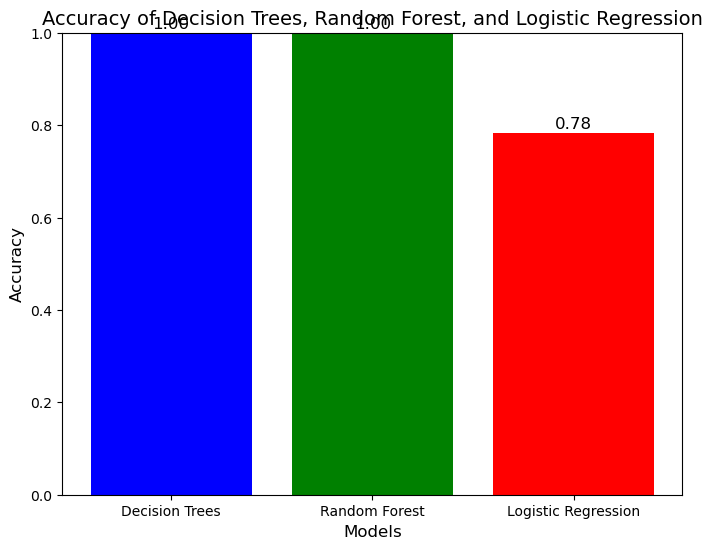

In [10]:
import matplotlib.pyplot as plt

# Example accuracy values (replace these with actual results)
models = ['Decision Trees', 'Random Forest', 'Logistic Regression']
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_logreg]  # Replace with actual accuracy values

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])

# Add title and labels
plt.title('Accuracy of Decision Trees, Random Forest, and Logistic Regression', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()